In [1]:
from IPython.display import *

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

from eralchemy import render_er


In [2]:
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Table, Column, Integer, Numeric, String, Boolean

Base = declarative_base()

class Cookie(Base):
    __tablename__ = 'cookies'

    cookie_id = Column(Integer(), primary_key=True)
    cookie_name = Column(String(50), index=True)
    cookie_recipe_url = Column(String(255))
    cookie_sku = Column(String(55))
    quantity = Column(Integer())
    unit_cost = Column(Numeric(12, 2))

In [3]:
Cookie.__table__

Table('cookies', MetaData(bind=None), Column('cookie_id', Integer(), table=<cookies>, primary_key=True, nullable=False), Column('cookie_name', String(length=50), table=<cookies>), Column('cookie_recipe_url', String(length=255), table=<cookies>), Column('cookie_sku', String(length=55), table=<cookies>), Column('quantity', Integer(), table=<cookies>), Column('unit_cost', Numeric(precision=12, scale=2), table=<cookies>), schema=None)

In [4]:
from datetime import datetime
from sqlalchemy import DateTime

class User(Base):
    __tablename__ = 'users'
    
    user_id = Column(Integer(), primary_key=True)
    username = Column(String(15), nullable=False, unique=True)
    email_address = Column(String(255), nullable=False)
    phone = Column(String(20), nullable=False)
    password = Column(String(25), nullable=False)
    created_on = Column(DateTime(), default=datetime.now)
    updated_on = Column(DateTime(), default=datetime.now, onupdate=datetime.now)

In [5]:
User.__table__

Table('users', MetaData(bind=None), Column('user_id', Integer(), table=<users>, primary_key=True, nullable=False), Column('username', String(length=15), table=<users>, nullable=False), Column('email_address', String(length=255), table=<users>, nullable=False), Column('phone', String(length=20), table=<users>, nullable=False), Column('password', String(length=25), table=<users>, nullable=False), Column('created_on', DateTime(), table=<users>, default=ColumnDefault(<function datetime.now at 0x000000000AC1FD08>)), Column('updated_on', DateTime(), table=<users>, onupdate=ColumnDefault(<function datetime.now at 0x000000000AC1FE18>), default=ColumnDefault(<function datetime.now at 0x000000000AC1FD90>)), schema=None)

In [6]:
from sqlalchemy import ForeignKey
from sqlalchemy.orm import relationship, backref

class Order(Base):
    __tablename__ = 'orders'
    order_id = Column(Integer(), primary_key=True)
    user_id = Column(Integer(), ForeignKey('users.user_id'))
    shipped = Column(Boolean(), default=False)
    user =  relationship("User", backref=backref('orders', order_by=id))


class LineItems(Base):
    __tablename__ = 'line_items'
    line_items_id = Column(Integer(), primary_key=True)
    order_id = Column(Integer(), ForeignKey('orders.order_id'))
    cookie_id = Column(Integer(), ForeignKey('cookies.cookie_id'))
    quantity = Column(Integer())
    extended_cost = Column(Numeric(12, 2))
    order = relationship("Order", backref=backref('line_items', order_by=line_items_id))
    cookie = relationship("Cookie", uselist=False)

In [7]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///:memory:')

Base.metadata.create_all(engine)

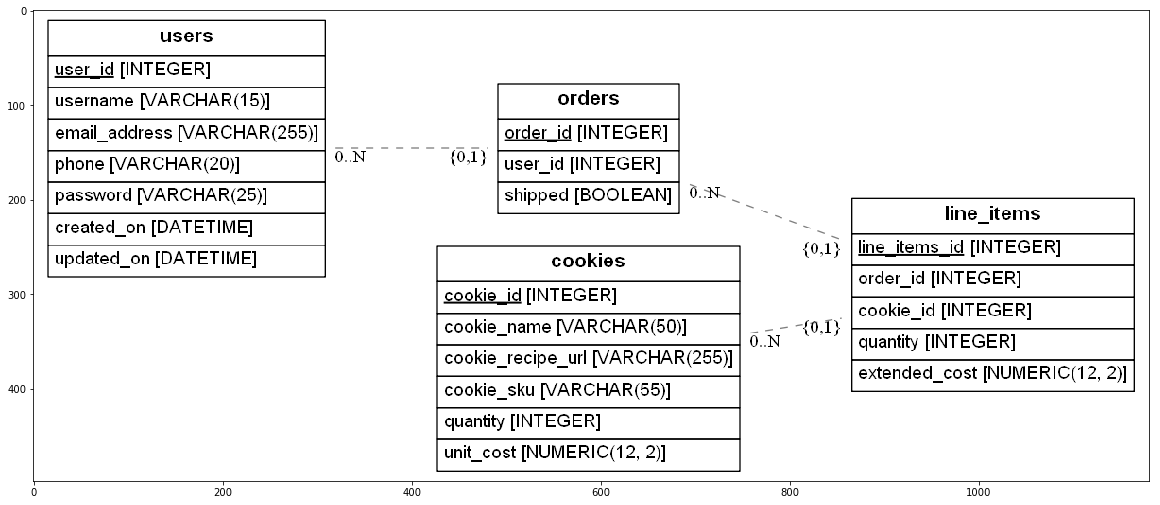

In [9]:
filename = 'mymodel.png'
render_er(Base, filename)
imgplot = plt.imshow(mpimg.imread(filename))
plt.rcParams["figure.figsize"] = (20,20)
plt.show()